### Загрузка и подготовка данных к анализу

In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math
import time
from datetime import datetime
from datetime import date, timedelta as td


In [2]:
visit = pd.read_csv('/datasets/visits_info_short.csv')
order = pd.read_csv('/datasets/orders_info_short.csv')
cost = pd.read_csv('/datasets/costs_info_short.csv')


In [3]:
visit.head(10)

User Id         Region   Device         Channel        Session Start  \
0  981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3  326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5   90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6   43958116050  United States  Android         organic  2019-05-01 09:03:21   
7  185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8  446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9  100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
5  2019-05-01 08:19:56  
6  2019-05-01 10:08:39  
7  2019-05-01 10:00:43  
8  2019-05-01 10:59:17  
9  2019-05-01 04:57:05

In [4]:
visit.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
visit.duplicated().sum()

0

In [6]:
visit['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [7]:
# преобразование данных о времени
visit['session_start'] = pd.to_datetime(visit['session_start'])
visit['session_end'] = pd.to_datetime(visit['session_end'])
visit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [8]:
order.head(10)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
5  129100331057  2019-05-01 01:56:28     4.99
6  626807144131  2019-05-01 02:39:21     4.99
7  914062168985  2019-05-01 02:02:18     4.99
8  769669137453  2019-05-01 03:39:47     4.99
9  434198630691  2019-05-01 18:16:50     5.99

In [9]:
order.columns = ['user_id', 'event_dt', 'revenue']
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   40212 non-null  int64  
 1   event_dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
order.duplicated().sum()

0

In [11]:
order['event_dt'] = pd.to_datetime(order['event_dt'])


In [12]:
cost.head(10)

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
5  2019-05-06  FaceBoom  118.8
6  2019-05-07  FaceBoom  101.2
7  2019-05-08  FaceBoom  100.1
8  2019-05-09  FaceBoom   93.5
9  2019-05-10  FaceBoom  104.5

In [13]:
cost.columns = ['dt', 'channel', 'costs']
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [14]:
cost.duplicated().sum()

0

In [15]:
cost['dt'] = pd.to_datetime(cost['dt'])


Тип данных на соответствующий заменили. 
Дубликаты в таблицах отсутствуют.

### Задаем функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [16]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа 
horizon_days = 14  # горизонт анализа 

In [17]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

In [18]:
def get_conversion(profiles, purchases, observation_date, horizon_days, dimensions = [], ignore_horizon = False):
    # Шаг 1. Получить профили пользователей и список пользовательских покупок
    # мы получаем их через аргументы profiles и purchases
    
    # отсекаем всех пользователей, которые не могли "дожить" до нужного горизонта 
    # (присоединились позже чем observation_date - horizon)
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    
    # Шаг 2. Найти дату и время первой покупки, совершенной пользователем
    first_purchases = purchases.sort_values(by = ['user_id', 'event_dt']).groupby('user_id').agg({'event_dt': 'first'}).reset_index()
 
    # Шаг 3. Присоединить первые покупки к профилям пользователей и расчитать для каждой покупки время жизни пользователя (lifetime)
    # формируем массив сырых данных
    result_raw = result_raw.merge(first_purchases[['user_id', 'event_dt']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['event_dt'] - result_raw['first_ts']).dt.days
    
    # этот столбец мы будем использовать для группировки в случае, когда в dimensions ничего не передано
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']  
    
    # функция группировки по нужному набору измерений
    def group_by_dimensions(df, dims, horizon_days):  
        # Шаг 4. Построить сводную таблицу, у которой в строках находятся даты первой посещения пользователей, в столбцах - lifetime, а в ячейках число уникальных пользовательских идентификаторов - это будет таблица конверсии
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим "треугольную таблицу"         
        
        # Шаг 5. Просуммировать ячейки таблицы конверсии вдоль каждого ряда с накоплением
        result = result.fillna(0).cumsum(axis = 1)
        
        # Шаг 6. Расчитать размеры когорт и соединить таблицы размеров когорт и таблицу конверсии
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к треугольной таблице
        
        # Шаг 7. Разделить каждую ячейку таблицы конверсии на соответствующий размер когорты
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждый из столбцов на размер когорты 
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # оставляем только наблюдения до нужного горизонта и столбец размеров когорт
        result['cohort_size'] = cohort_sizes                                                                     # пересприсваиваем столбец размеров когорт, ведь во время деления он превратился в 1
        return result
    
    # расчитываем конверсию 
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # рассчитываем конверсию по всем параметрам + дата
    if 'cohort' in dimensions: dimensions = []  # здесь у нас есть дополнительное измерение - дата, поэтому cohort больше не понадобится
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем и таблицы конверсии и сырые данные (чтобы в случае чего можно было в них покопаться при отладке)
    return result_raw, result_grouped, result_in_time

In [19]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )



In [20]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

Функции LTV, ROI, удержания(retention), конверсии(conversion) заданы

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [21]:
def get_profiles(sessions, orders, ad_costs):
    # Шаг 1. Передадим в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)
    
    # сортируем сессии по id пользователя и дате для того,чтобы работал first
    # находим первые значения для параметров пользователя - будем считать их основными 
    profiles = (sessions.sort_values(by = ['user_id', 'session_start'])           
                        .groupby('user_id').agg({'session_start' : 'first',       
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})                                 
                        .rename(columns = {'session_start' : 'first_ts'})  
                        .reset_index()  # вернем все данные из индекса в колонки                                           
               )
    # определим дату первого посещеня 
    # и начало месяца первого посещения - они понадобятся нам при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date     
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')     
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())   
            
    # Шаг 2. К данным о рекламных затратах добавим количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'unique_users'}).reset_index()
    ad_costs = ad_costs.merge(new_users, on = ['dt', 'channel'], how = 'left')
    
    # Шаг 3. Найдем среднюю стоимость привлечения пользователя
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # Шаг 4. Присоединим данные к профилям пользователей информацию о средней стоимости привлечения в день привлечения пользователя из нужного источника
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on = ['dt', 'channel'], how = 'left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0
    
    return profiles

In [22]:
profiles = get_profiles(visit, order, cost)

In [23]:
profiles['dt'] = profiles['first_ts'].dt.date
profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

In [24]:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max() 

In [25]:
min_analysis_date

Timestamp('2019-05-01 00:00:00')

In [26]:
observation_date

Timestamp('2019-10-27 00:00:00')

Минимальная дата привлечения пользователей - 1 мая 2019 года.
Максимальная дата привлечения пользователей - 27 октября 2019 года.
Даты совпадают с указанными в задании.

In [27]:
visit.head(5)

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

Больше всего платящих пользователей приходится на USA

In [28]:
region_payer_share = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
region_payer_share.columns = ['total_users', 'payers', 'payers_percent']
region_payer_share['payers_percent'] = region_payer_share['payers_percent']*100
region_payer_share['region_percent'] = region_payer_share['total_users'] / region_payer_share['total_users'].sum() *100
region_payer_share.sort_values(by= 'payers_percent', ascending = False).style.format({'share': '{:.1f}%'})

In [29]:
device_payer_share = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
device_payer_share.columns = ['total_users', 'payers', 'payers_percent']
device_payer_share['payers_percent'] = device_payer_share['payers_percent']*100
device_payer_share['device_percent'] = device_payer_share['total_users'] / region_payer_share['total_users'].sum() *100
device_payer_share.sort_values(by= 'payers_percent', ascending = False).style.format({'share': '{:.1f}%'})

Большинство платящих пользователей предпочитают IPhone(6.2%) и Mac(6.4%). Также клиенты пользуются PC и Android

In [30]:
profiles['channel'].value_counts()

organic               56439
FaceBoom              29144
TipTop                19561
OppleCreativeMedia     8605
WahooNetBanner         8553
LeapBob                8553
RocketSuperAds         4448
MediaTornado           4364
YRabbit                4312
AdNonSense             3880
lambdaMediaAds         2149
Name: channel, dtype: int64

In [31]:
channel_payer_share = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
channel_payer_share.columns = ['total_users', 'payers', 'payers_percent']
channel_payer_share['payers_percent'] = channel_payer_share['payers_percent']*100
channel_payer_share['channel_percent'] = channel_payer_share['total_users'] / region_payer_share['total_users'].sum() *100
channel_payer_share.sort_values(by= 'payers_percent', ascending = False).style.format({'share': '{:.1f}%'})

Больше всего платящих пользователей пришло из каналов: FaceBoom, TipTop, AdNonSense, lambdaMediaAds

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [32]:
channel_costs_report = cost.groupby('channel').agg({'costs': 'sum'})
channel_costs_report['costs_percent'] = channel_costs_report['costs'] / channel_costs_report['costs'].sum() *100
channel_costs_report.sort_values(by='costs', ascending=False)


costs  costs_percent
channel                                    
TipTop              54751.30      51.898295
FaceBoom            32445.60      30.754910
WahooNetBanner       5151.00       4.882589
AdNonSense           3911.25       3.707441
OppleCreativeMedia   2151.25       2.039152
RocketSuperAds       1833.00       1.737485
LeapBob              1797.60       1.703930
lambdaMediaAds       1557.60       1.476436
MediaTornado          954.48       0.904744
YRabbit               944.22       0.895018

In [33]:
cost['costs'].sum().round()

105497.0

Общая сумма расходов на маркетинг: 105497

Больше всего было потрачено на маркетинг в каналах TipTop и FaceBoom. На них приходится больше 80% всех затрат.

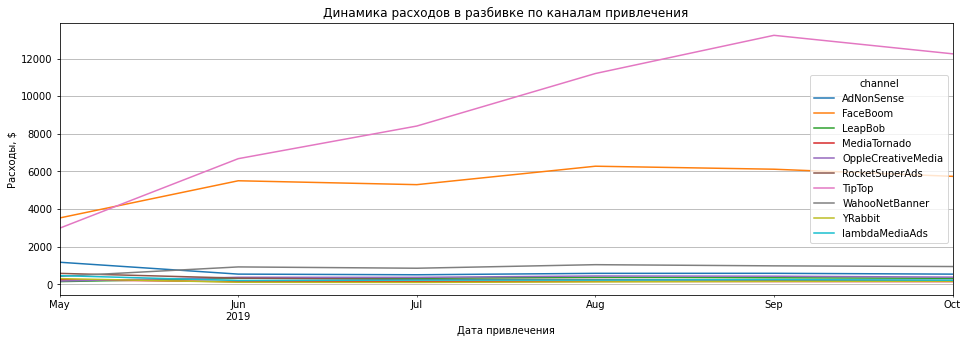

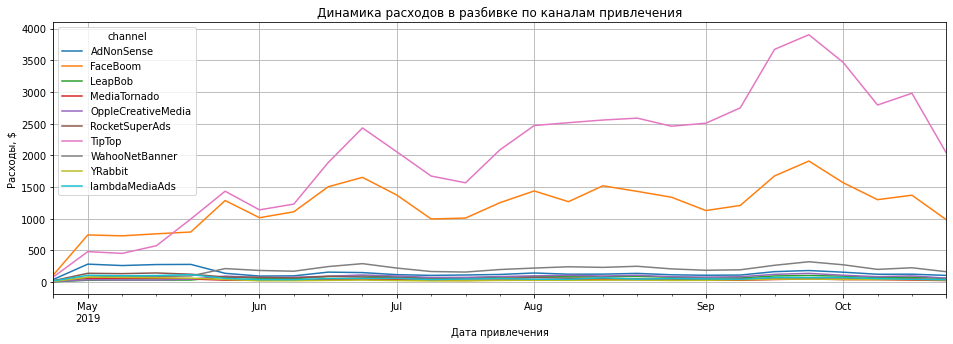

In [34]:
cost['by_month'] = cost['dt'].astype('datetime64[M]')
cost['by_week'] = cost['dt'].astype('datetime64[W]')

columns = ['by_month', 'by_week']

for i, col in enumerate(columns):    
    cost.pivot_table(index=col, columns='channel', values='costs', aggfunc='sum'
).plot(grid=True, figsize=(16, 5), title = 'Динамика расходов в разбивке по каналам привлечения', xlabel = 'Дата привлечения',
       ylabel = 'Расходы, $')

plt.show()


Расходы постоянно растут у каналов: TipTop и FaceBoom.

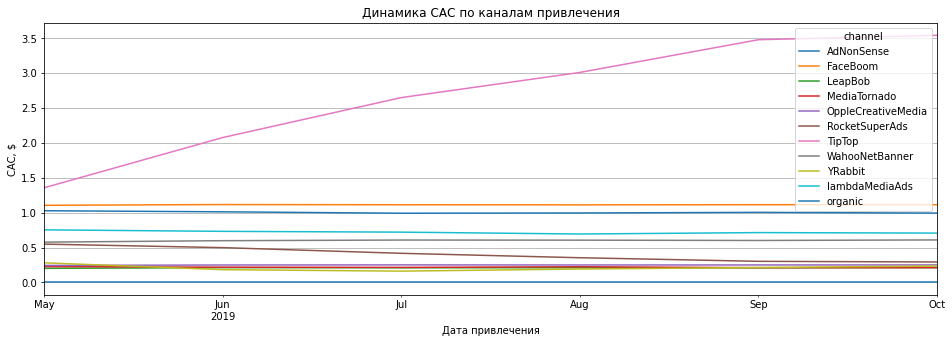

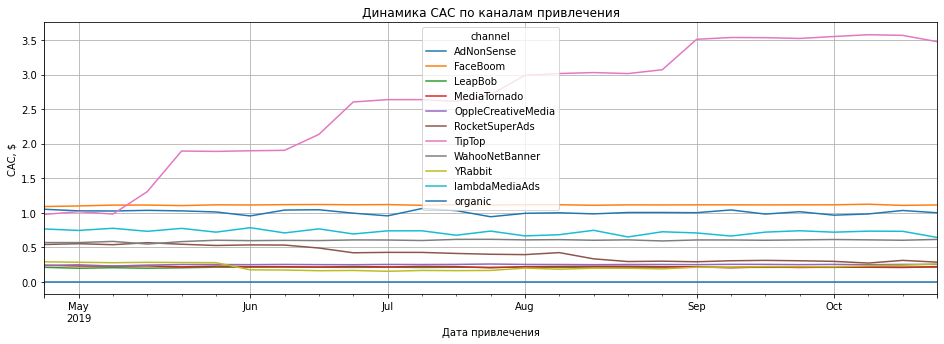

In [35]:
profiles['by_month'] = profiles['dt'].astype('datetime64[M]')
profiles['by_week'] = profiles['dt'].astype('datetime64[W]')

columns = ['by_month', 'by_week']


for i, col in enumerate(columns):    
    profiles.pivot_table(index=col, columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(16, 5), title = 'Динамика САС по каналам привлечения', xlabel = 'Дата привлечения', 
       ylabel = 'CAC, $')

plt.show()



Можно сделать вывод, что стоимость привлечения одного клиента со временем возрастала только у TipTop 

In [36]:
#Посмотрим на CAC для каждого источника трафика.

cac_by_channel = pd.DataFrame()
# уберём органических пользователей:
profiles = profiles.query('channel != "organic"')
cac_by_channel['acquisition_cost_mean'] = profiles.groupby('channel')['acquisition_cost'].mean()
cac_by_channel.sort_values(by='acquisition_cost_mean', ascending=False).style.format({'acquisition_cost_mean': '{:.2f}'})

In [37]:
profiles['acquisition_cost'].mean()

1.1274813239427588

In [38]:
CAC_general = profiles.query('channel != "TipTop"')
CAC_general['acquisition_cost'].mean()

0.6856826289049833

Средний CAC для всего проекта составляет - 1.27. Но средний CAC без канала TipTop составляет - 0.68 

Самыми дорогими трафиками вышли TipTop (2.8), FaceBoom (1.11), AdNonSense(1.01).

Сократить расходы на трафик TipTop
Обратить внимание на каналы LeapBob, MediaTornado, YRabbit, OppleCreativeMedia. Привлечение пользователей с этих каналов обходится дешевле всего

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [39]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [40]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

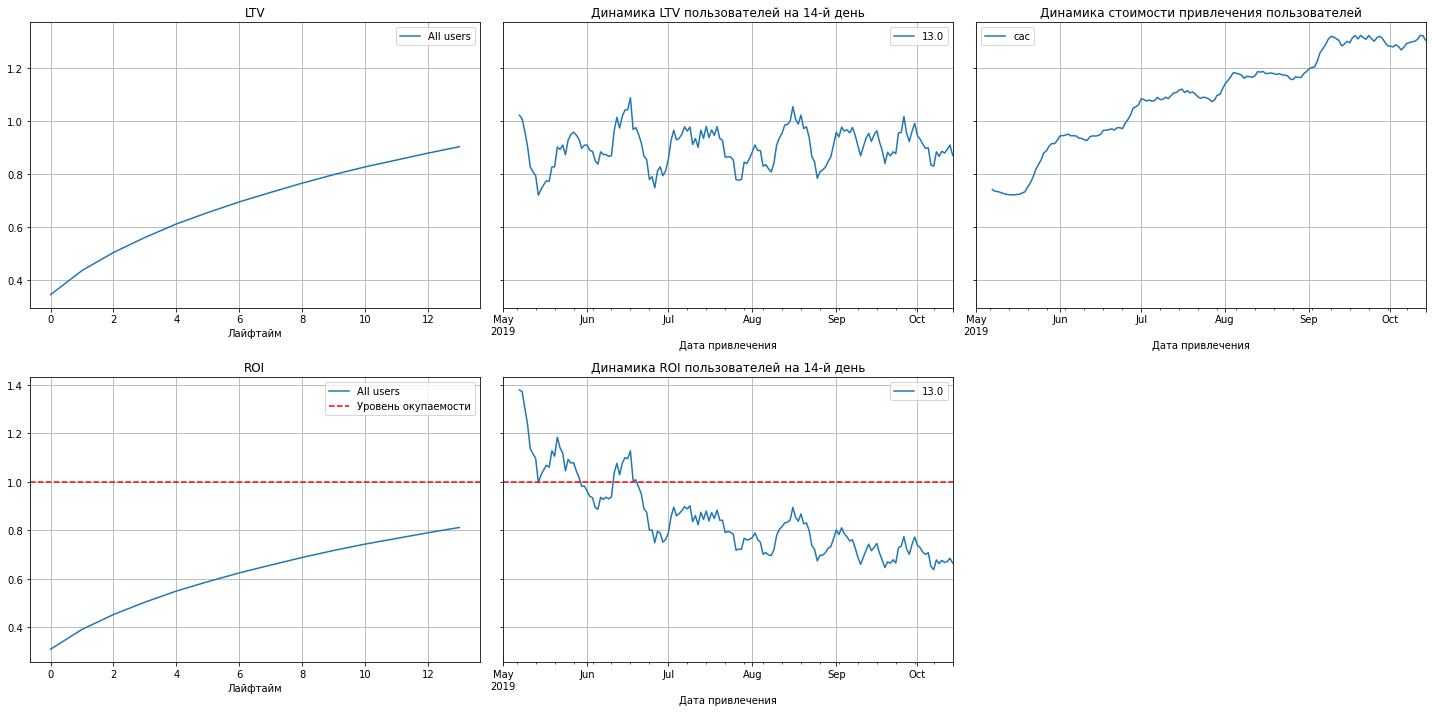

In [41]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

LTV держится на примерно одном уровне на протяжении всего эксперимента. 
CAC на протяжении всего эксперимента растёт. 
ROI не доходит до уровня окупаемости. 
Пользователи перестают окупаться уже в июне. 

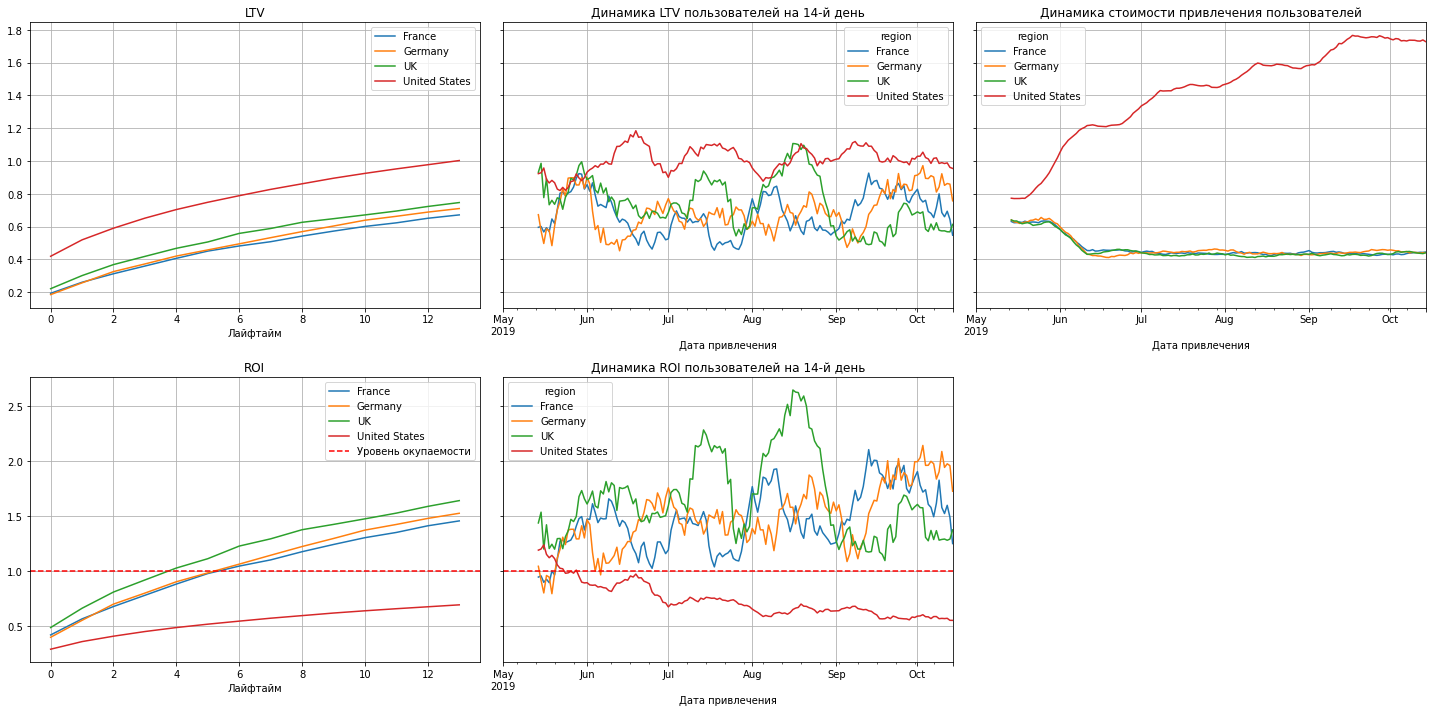

In [42]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV пользователей из США самый высокий, но затраты на рекламу не окупаются

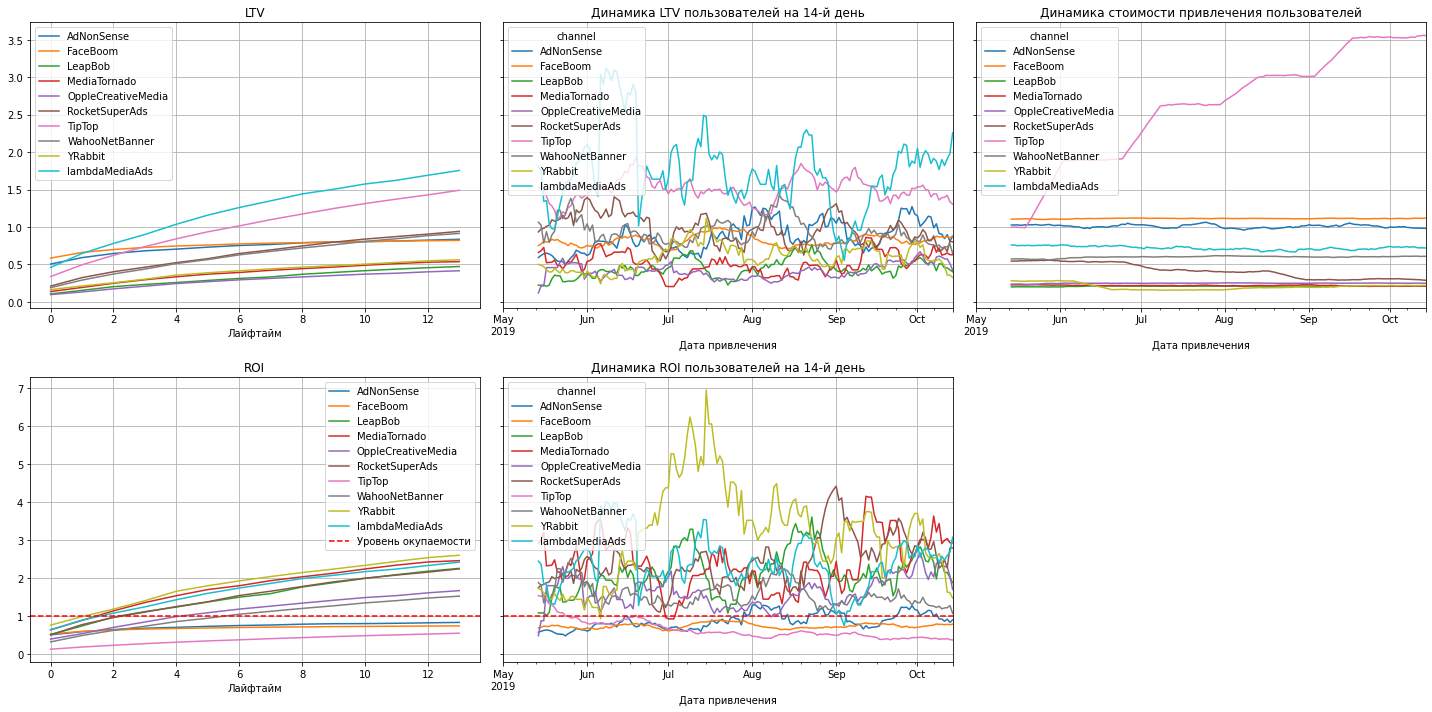

In [43]:
# смотрим окупаемость с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV на каналах существенно различается. 
динамика стоимости привлечения пользователей растёт только у TipTop. 
Не окупаются к концу 2 недели пользователи из каналов: TipTop, FaceBoom, AdNonSense.

In [44]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей'.format(horizon))

    plt.tight_layout()
    plt.show() 

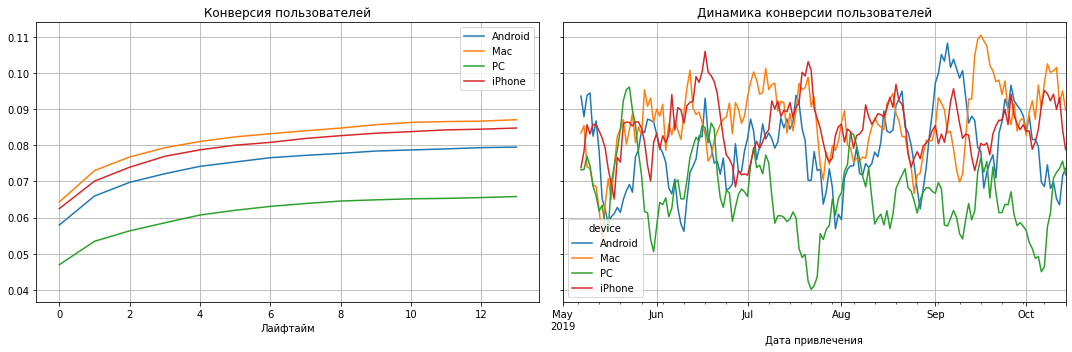

In [45]:
dimensions = ['device']
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Большие просадки по конверсии у пользователей PC и Android



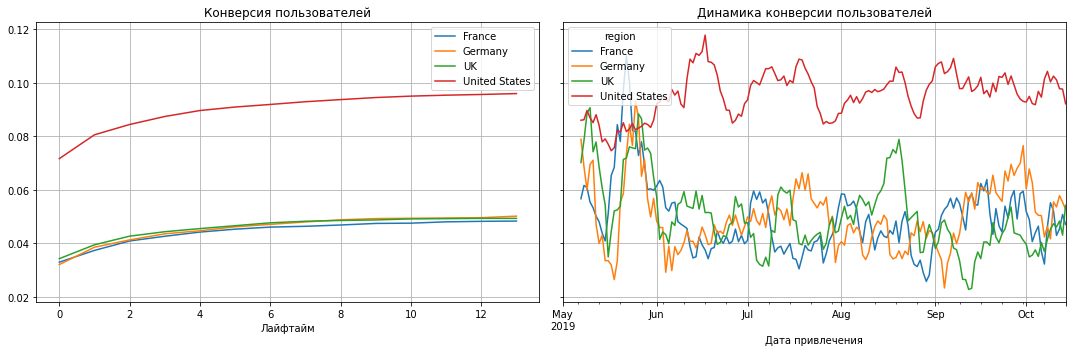

In [46]:
dimensions = ['region']
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия пользователей из США в 2 раза выше чем у пользователей из других стран

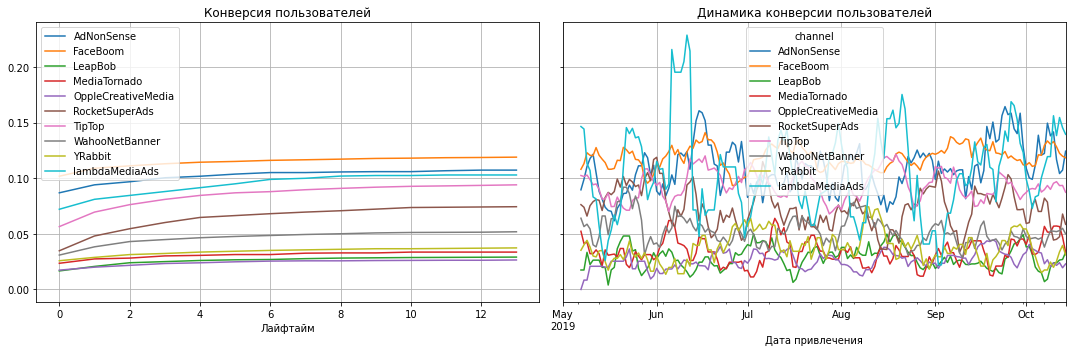

In [47]:
dimensions = ['channel']
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

В конверсии пользователей из разных каналов наблюдается сезонность.

In [48]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

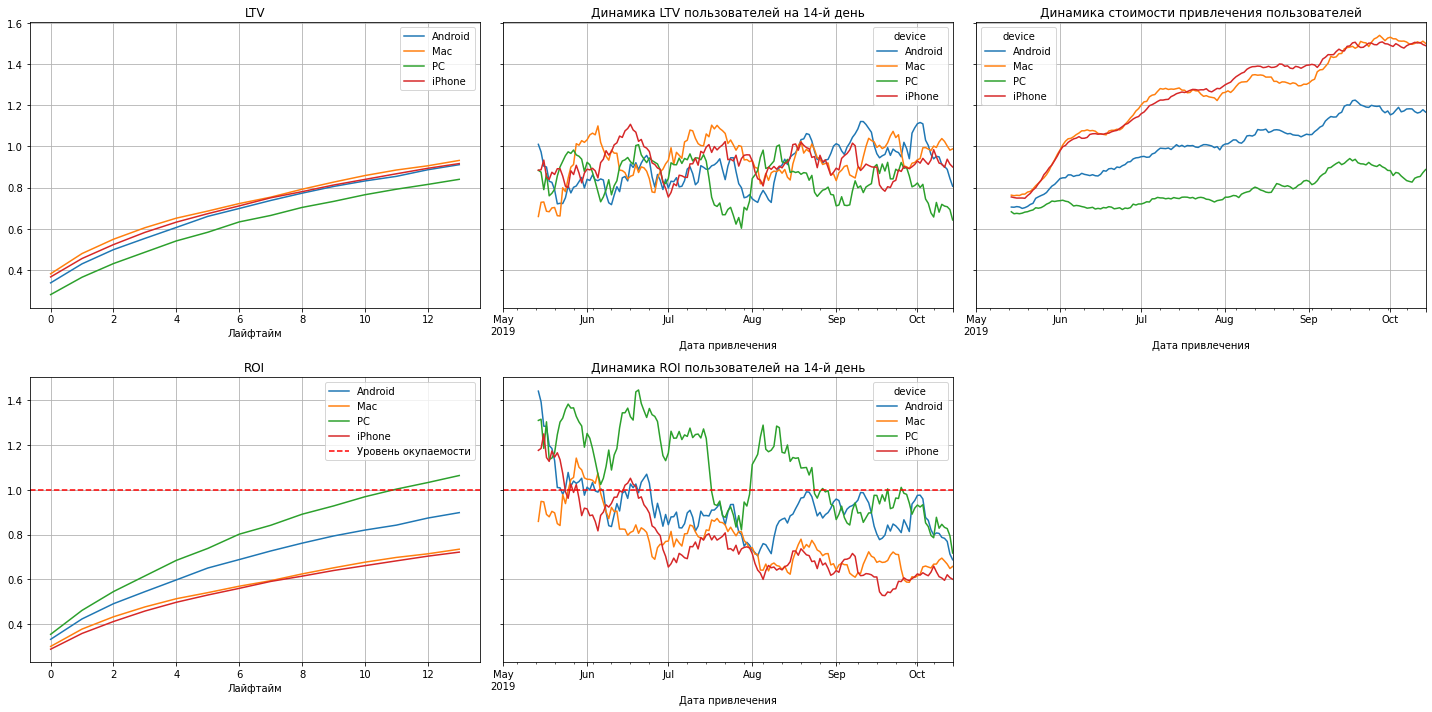

In [49]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 


LTV примерно одинаковое по всем устройствам, чуть проседают пользватели PC. 
Динамика стоимости привлечения пользователей растёт по всем устройствам, но особенно сильно у пользвателел iOS. 
Наблюдается окупаемость устройст PC, к концу лайфтайма, когда по остальным устройствам реклама так и не окупилась. 
Пользователи Android, Mac, iPhone не окупаются уже к концу первого месяца. Pc перестали окупаться после сентября и также была просадка в конце июля.

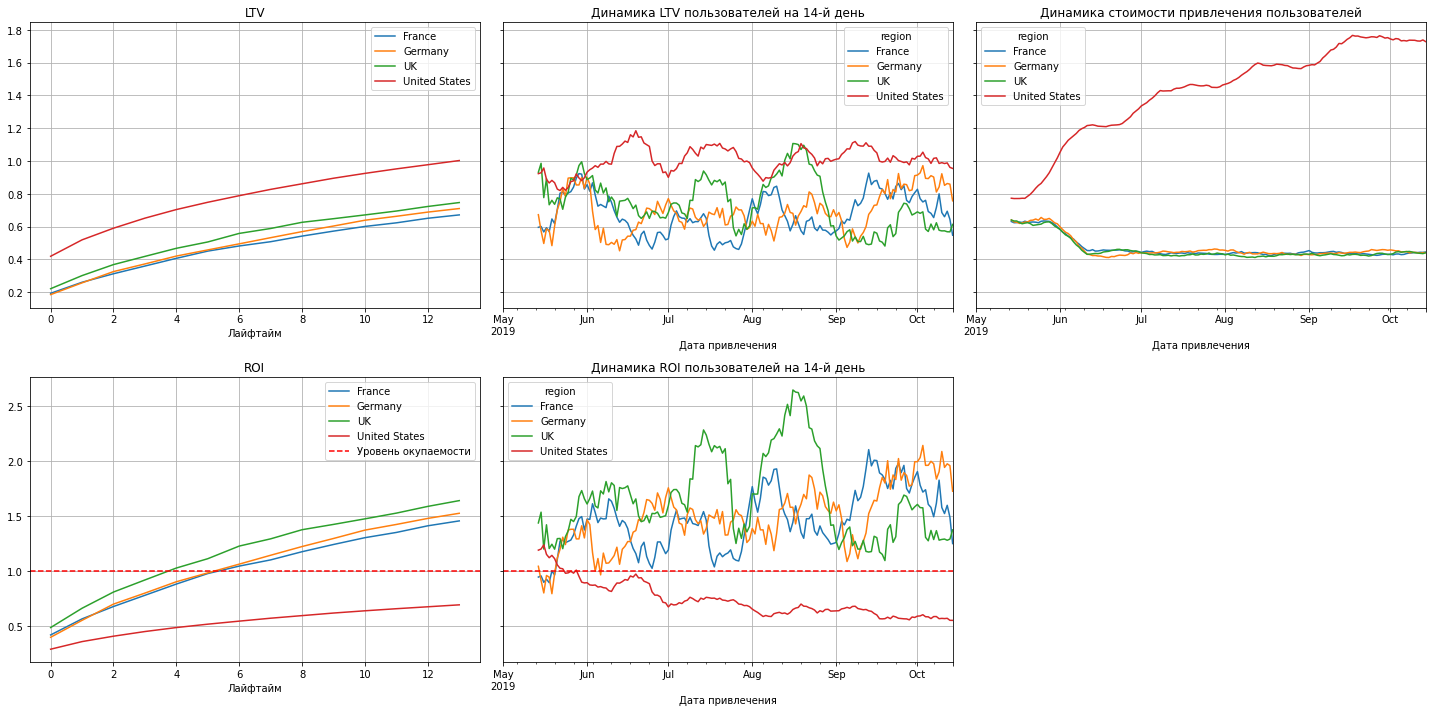

In [50]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV Соединенных Штатов заметно выше. 
Динамика стоимости привлечения США растет с высокой скоростью. У остальных стран держиться стабильно.
Реклама США не окупается. 
Регион США перестает окупаться в конце первого месяца, стоит обратить на хорошие скочки роста у UK в летние месяцы.

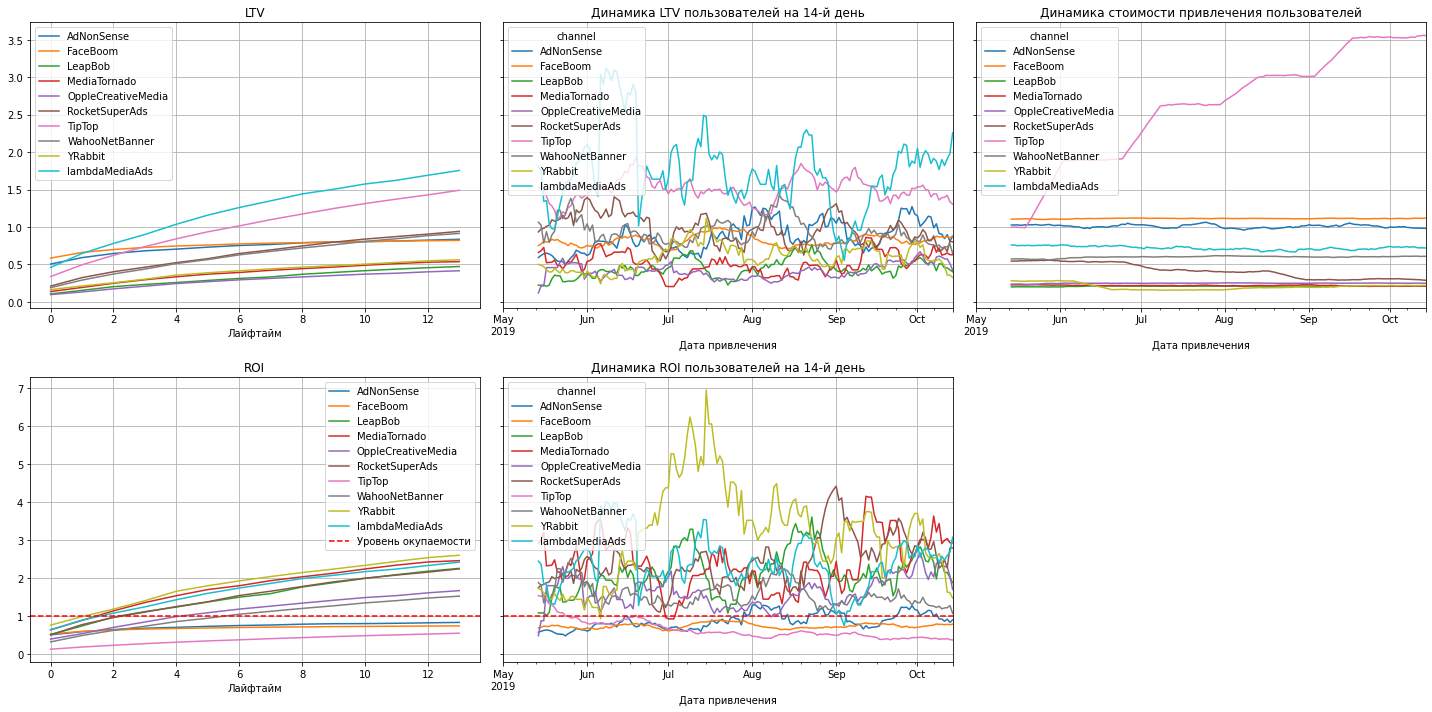

In [51]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Можно выделить сильнейшие показатели LTV у каналов LambdaMediaADs и TipTop. 
Стоимость привлечения TipTop имеет высокий рост.
Не окупаются каналы: AdNonSense, FaceBoom, Tiptop. 
Можем отметить высокую динамику роста окупаемости канала YRabbit.

1. Реклама не окупается к концу второй недели.

2. Из стран USA снижает окупаемость рекламы. Из каналов: TipTop, FaceBoom, AdNonSense. Хуже всего удерживаются платящие пользователи устройств IPhone и MAC

3. Проблемы с окупаемостью вызваны неправильным распределением средств на привлечение с каналов

4. TipTop самый невыгодный канал для привлечения, с которого большинство пользователей из страны USA. Также стоит обратить внимание на каналы откуда привлекаются платящие пользователи PC, потому что они удерживаются лучше всего

### Дополнительная оценка

#### Для пользователей США 

In [52]:
visit_usa = visit[visit['region'] == 'United States']

profiles = get_profiles(visit_usa, order, cost)

profiles['dt'] = profiles['first_ts'].dt.date
profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

In [53]:
region_payer_share = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
region_payer_share.columns = ['total_users', 'payers', 'payers_percent']
region_payer_share['payers_percent'] = region_payer_share['payers_percent']*100
region_payer_share['region_percent'] = region_payer_share['total_users'] / region_payer_share['total_users'].sum() *100
region_payer_share.sort_values(by= 'payers_percent', ascending = False).style.format({'share': '{:.1f}%'})

В регионе США больше всего человек, примерно 2/3.

In [54]:
device_payer_share = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
device_payer_share.columns = ['total_users', 'payers', 'payers_percent']
device_payer_share['payers_percent'] = device_payer_share['payers_percent']*100
device_payer_share['device_percent'] = device_payer_share['total_users'] / region_payer_share['total_users'].sum() *100
device_payer_share.sort_values(by= 'payers_percent', ascending = False).style.format({'share': '{:.1f}%'})

Платящие клиенты из США по дивайсам примерно в равное колличество, но показатели с девайсами Android немного выше чем остальные, однако больше всего пользователей iPhone, а меньше всего PC.

In [55]:
channel_payer_share = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
channel_payer_share.columns = ['total_users', 'payers', 'payers_percent']
channel_payer_share['payers_percent'] = channel_payer_share['payers_percent']*100
channel_payer_share['channel_percent'] = channel_payer_share['total_users'] / region_payer_share['total_users'].sum() *100
channel_payer_share.sort_values(by= 'channel_percent', ascending = False).style.format({'share': '{:.1f}%'})

Больше всего платящих пользователей региона США пришло из каналов: FaceBoom, TipTop. Самый многочисленный канал - Organic, но у него меньше всего платящих пользователей.

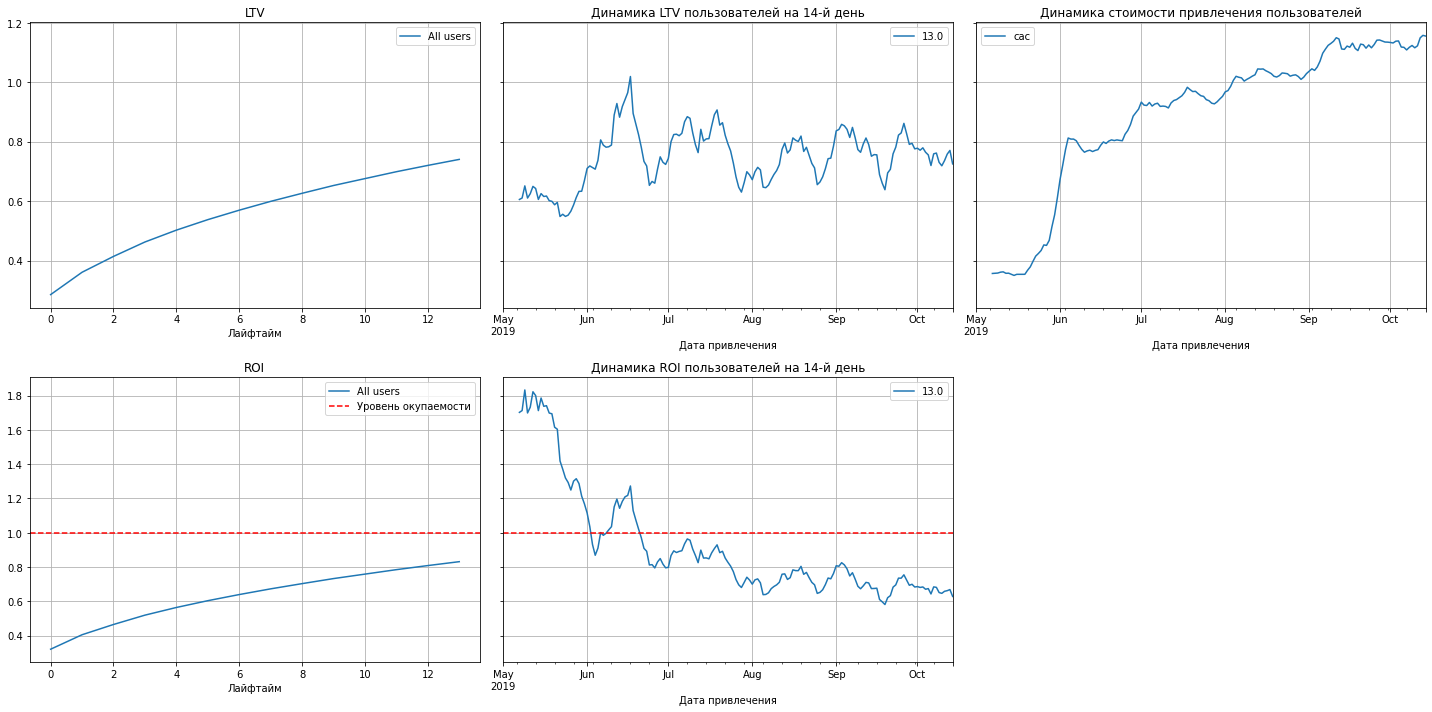

In [56]:
# считаем LTV и ROI пользователей США 
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

LTV пользователей США медленно растет, при этом наблюдается резкий скачок в конце мая. CAC также резко начало расти вконце мая, после июня более плавно. Показатель ROI так и не дошел до уровня окупаемости. По динамике видно, что вначале график ушел ниже уровеня окупаемости, но потом до середины июня стал расти, находясь выше уровня окупаемости, после чего снова упал.
Стоит обратить внимание именно на конец мая - начало июня.

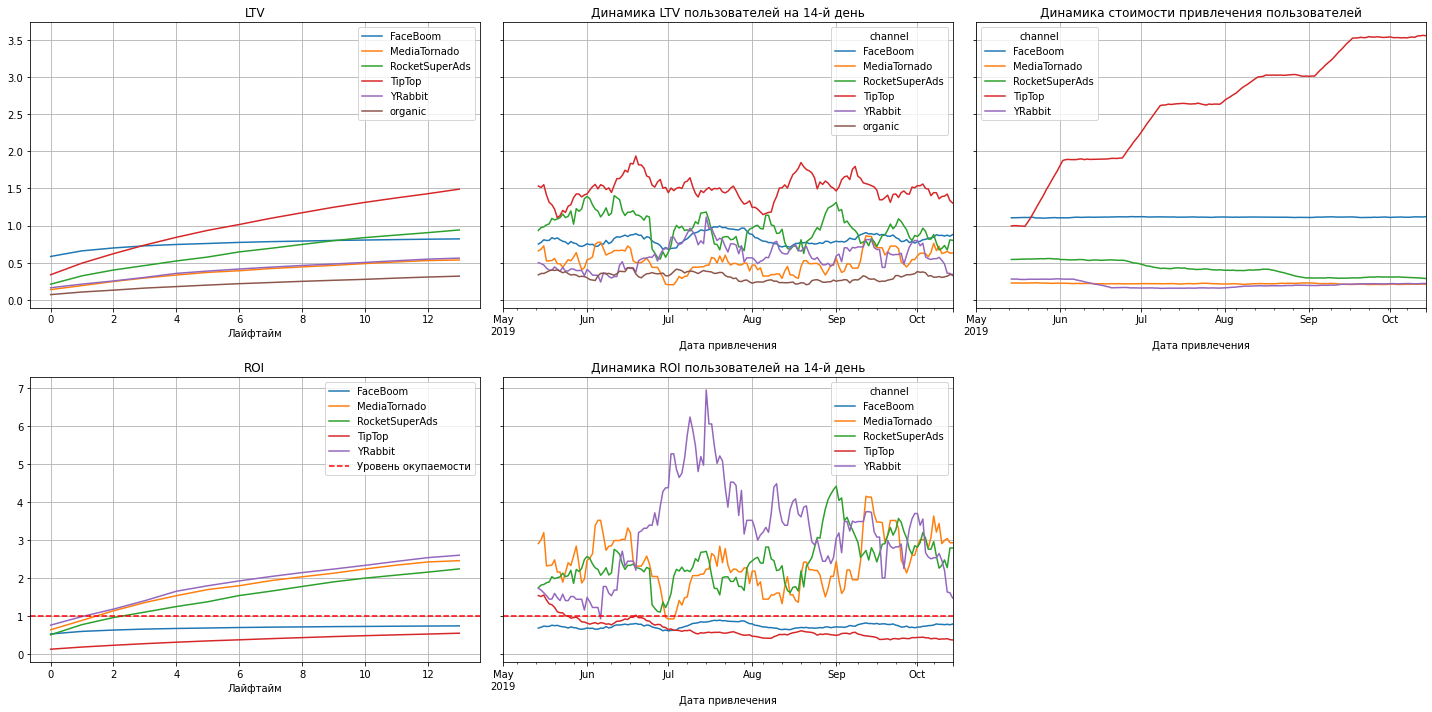

In [57]:
# смотрим окупаемость пользователей США с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Мы можем заметить что LTV канала FaceBoom перестал расти еще вначале лайфтайма, а канал TipTop имеет наиболее большой рост. По графику стоимости привлечения, канал TipTop после двух недель начал невероятно расти, когда остальные каналы оставались при мерно на том же уровне. ROI ниже отметки окупаемости у каналов FaceBoom и TipTop. Также стоит отметить хорошую окупаемость канала YRabbit с июля 2019 года и каналу RocketSuperAds начиная с августа.

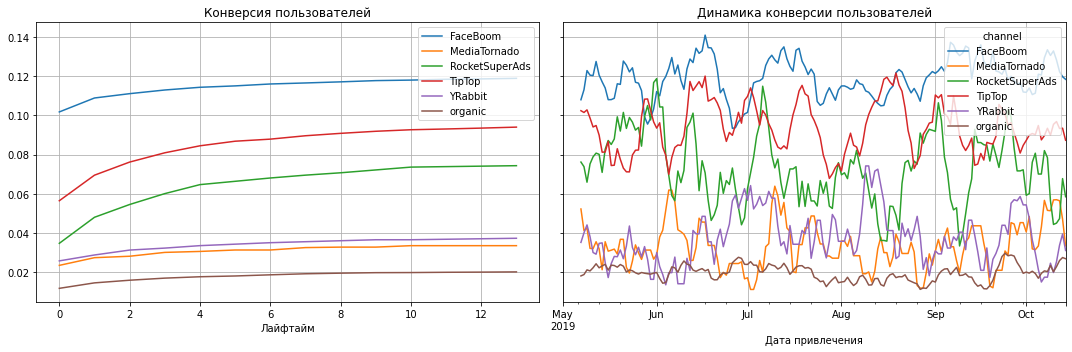

In [58]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Судя по графикам, каналы FaceBoom и TipTop конвертируются очень хорошо, причём постоянно. Видимо, дело в удержании. 

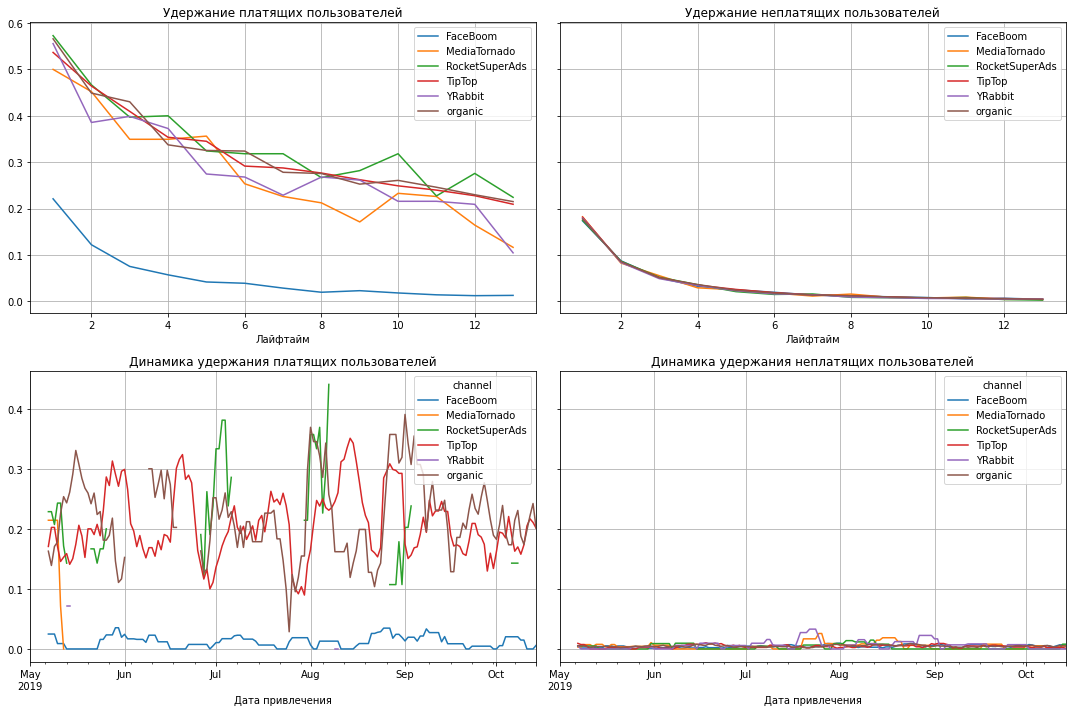

In [59]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visit, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Действительно, пользователи канала FaceBoom стабильно плохо удерживаются. Для платящих пользователей удержание намного ниже, чем на остальных устройствах. 
Скорее всего, причина в какой-нибудь технической проблеме.

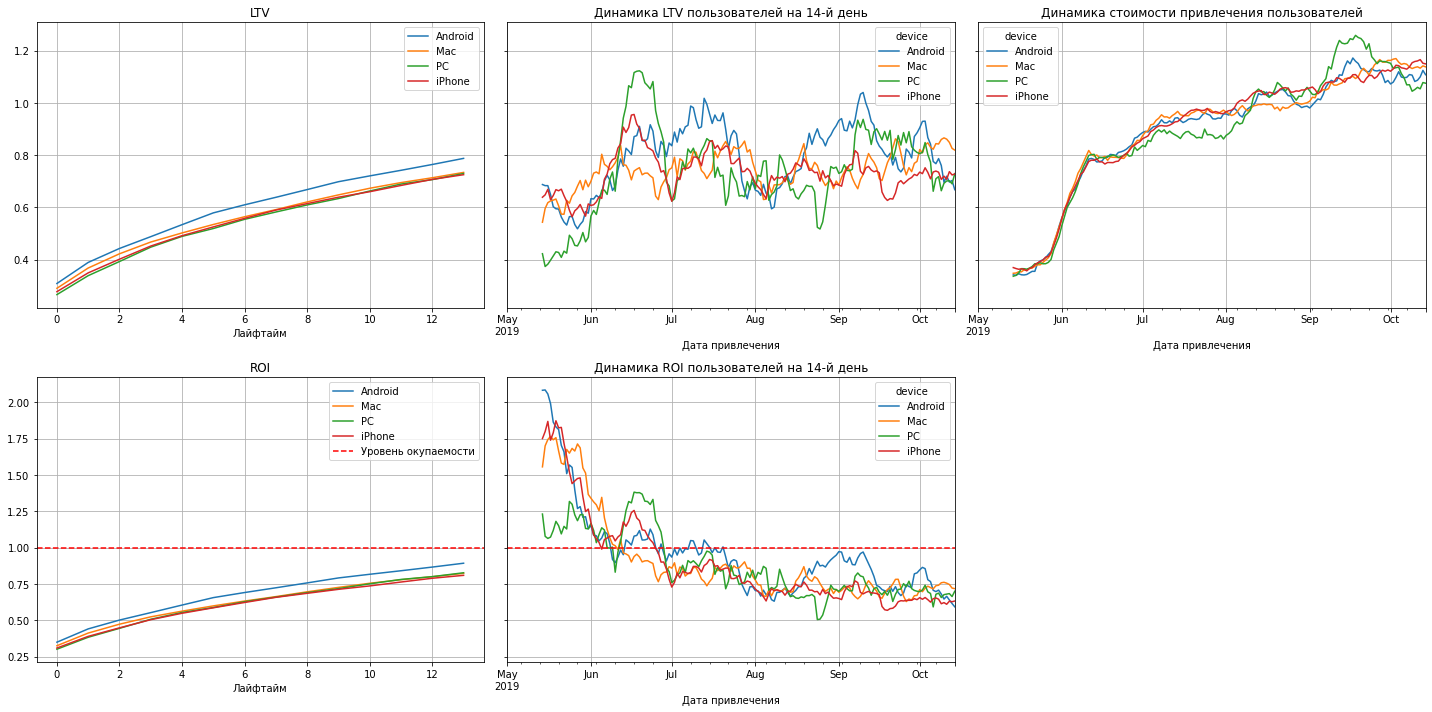

In [60]:
# смотрим окупаемость пользователей США  с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Мы можем заметить, что LTV всех устройст растет. По графику стоимости привлечения, все устройства также растут. ROI всех устройств ниже отметки окупаемости. Эти данные связаны с тем, что большинство пользователей пользуются каналом FaceBoom и TipTop. Поскольку эти два канала проблемные, данные по устройствам такие.

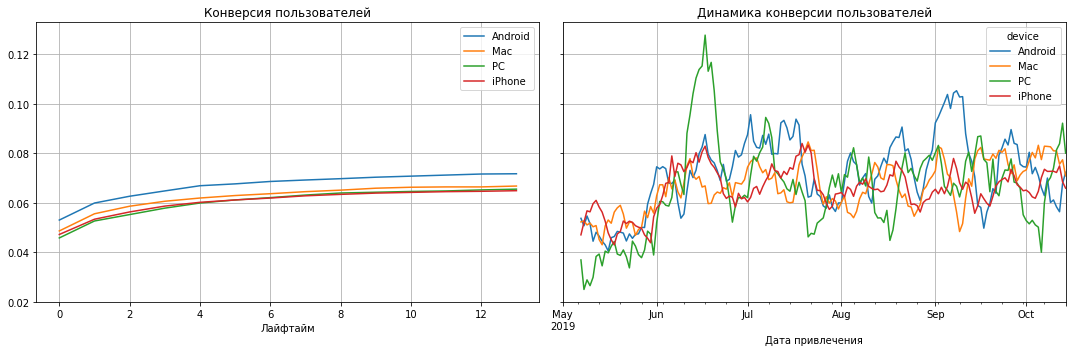

In [61]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей Android самая высокая.

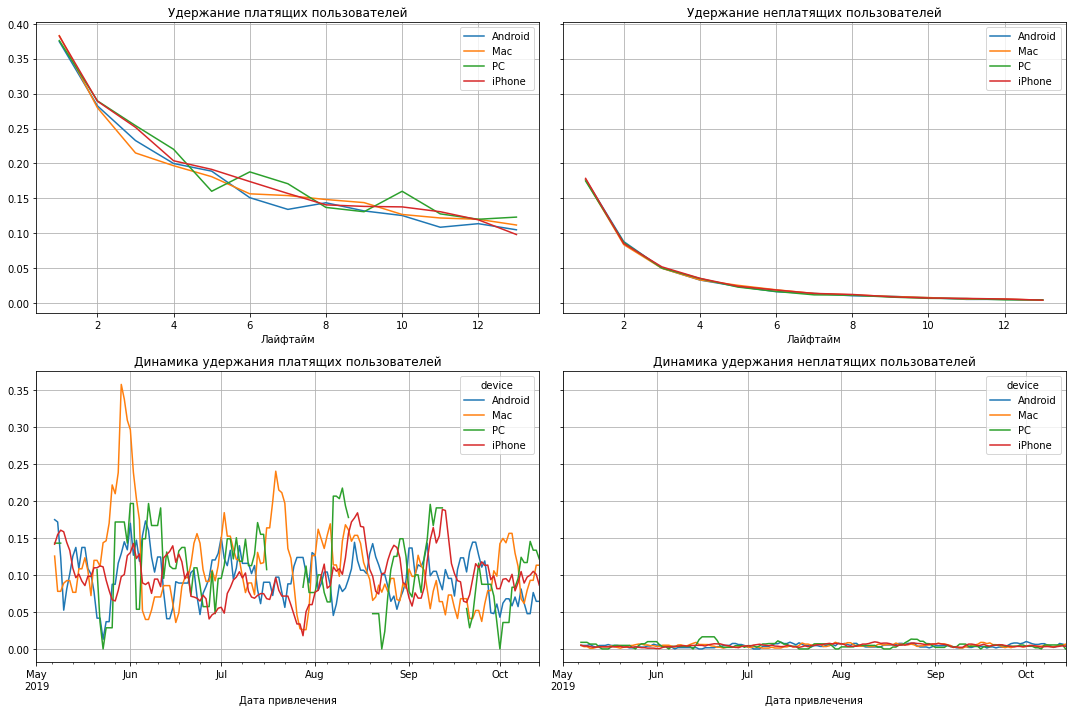

In [62]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visit, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Показатели удержания, примерно одинаковые у всех устройств.

#### Для пользователей Европы

In [63]:
visit = visit.query('region != "United States"')

profiles = get_profiles(visit, order, cost)

profiles['dt'] = profiles['first_ts'].dt.date
profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

In [64]:
region_payer_share = profiles.groupby('region').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
region_payer_share.columns = ['total_users', 'payers', 'payers_percent']
region_payer_share['payers_percent'] = region_payer_share['payers_percent']*100
region_payer_share['region_percent'] = region_payer_share['total_users'] / region_payer_share['total_users'].sum() *100
region_payer_share.sort_values(by= 'payers_percent', ascending = False).style.format({'share': '{:.1f}%'})

В целом можно сказать, что пользователи равнозначно распределены по регионам и платежеспособности.

In [65]:
device_payer_share = profiles.groupby('device').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
device_payer_share.columns = ['total_users', 'payers', 'payers_percent']
device_payer_share['payers_percent'] = device_payer_share['payers_percent']*100
device_payer_share['device_percent'] = device_payer_share['total_users'] / region_payer_share['total_users'].sum() *100
device_payer_share.sort_values(by= 'payers_percent', ascending = False).style.format({'share': '{:.1f}%'})

Большинство пользователей используют PC, далее идет Android. Самые платящие клиенты пользуются PC. Наименьшее количество у тоже у Android.

Платящие клиенты из Европы используют дивайсы примерно в равном колличестве, но показатели с девайсами Android немного выше чем остальные.

In [66]:
channel_payer_share = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer': ['sum', 'mean']})
channel_payer_share.columns = ['total_users', 'payers', 'payers_percent']
channel_payer_share['payers_percent'] = channel_payer_share['payers_percent']*100
channel_payer_share['channel_percent'] = channel_payer_share['total_users'] / region_payer_share['total_users'].sum() *100
channel_payer_share.sort_values(by= 'channel_percent', ascending = False).style.format({'share': '{:.1f}%'})

Самый популярный канал - Organic, при этом платящих клиентов там меньше всего. Средние результаты у каналов: LeapBob, OppleCreativeMedia, WahooNetBanner. Самое большое количество покупателей в самых малочисленных каналах: AdNonSense, lambdaMediaAds.

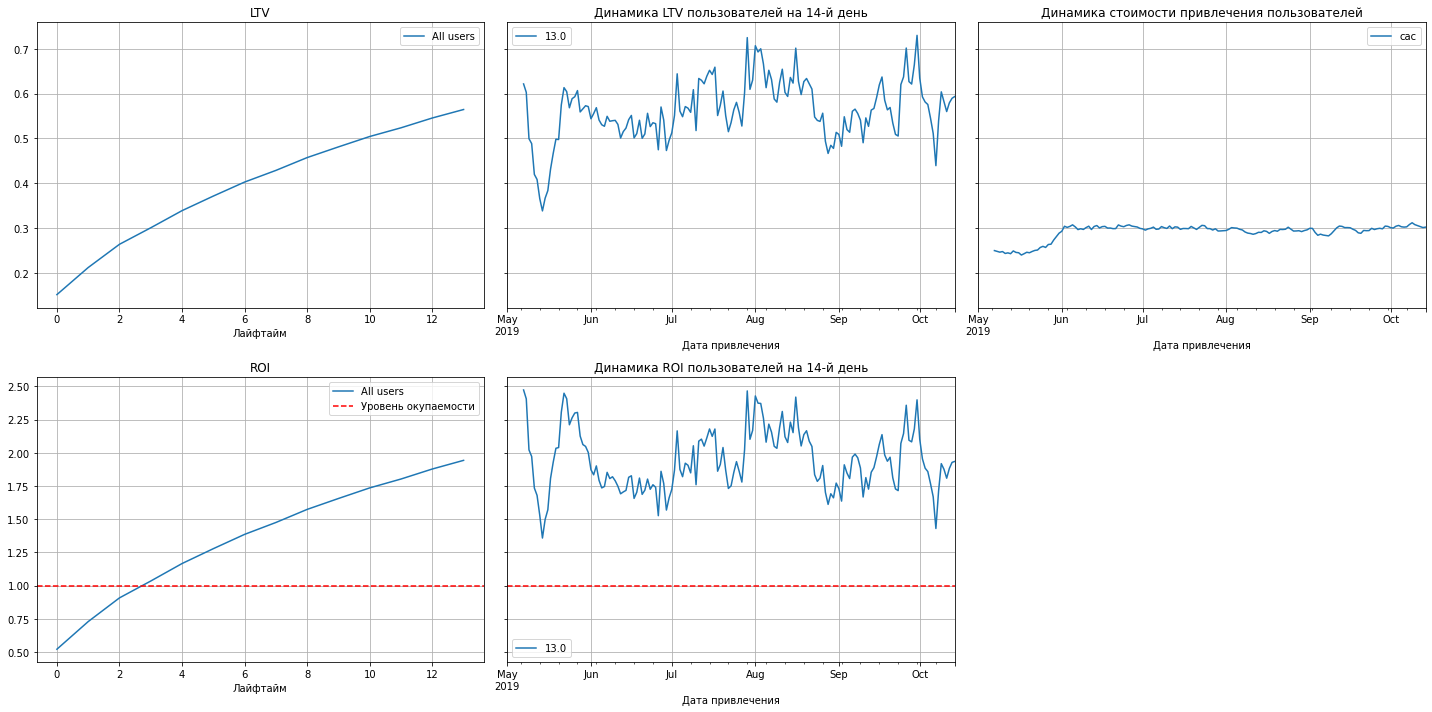

In [67]:
# считаем LTV и ROI пользователей Европы
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

Общая сумма денег клиентов стабильно растет. Был небольшой провал в динамике в конце мая. Стоимость привлечения стабильна. Вся реклама окупается.

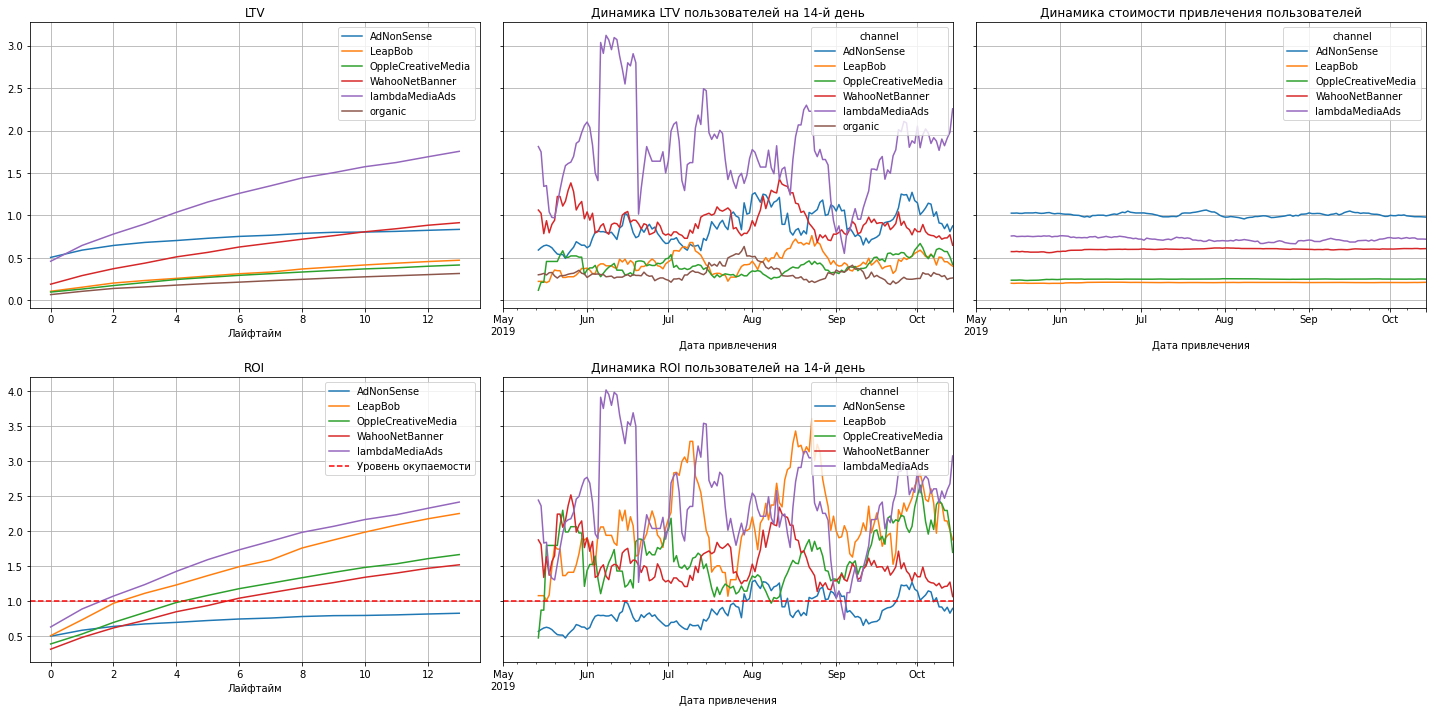

In [68]:
# смотрим окупаемость пользователей Европы с разбивкой по каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Один канал все-таки выбивается из окупаемости - AdNonSense. Лидер по численности плативших клиентов.

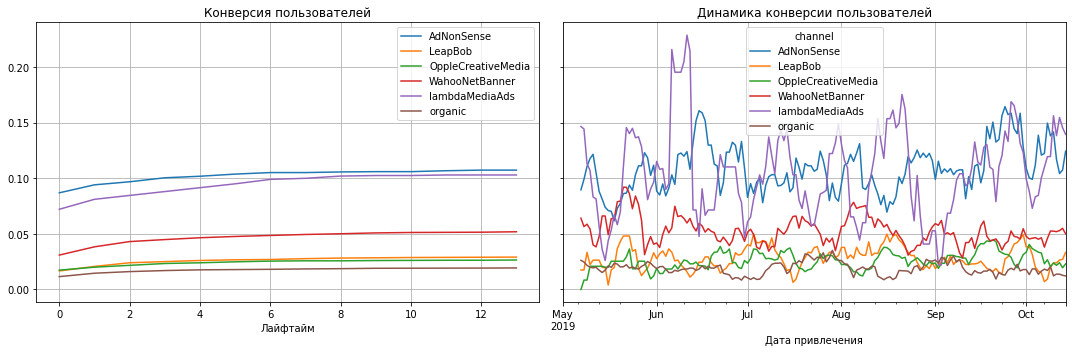

In [69]:
# смотрим конверсию с разбивкой по каналам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия у AdNonSense отличная, посмотрим удержание.

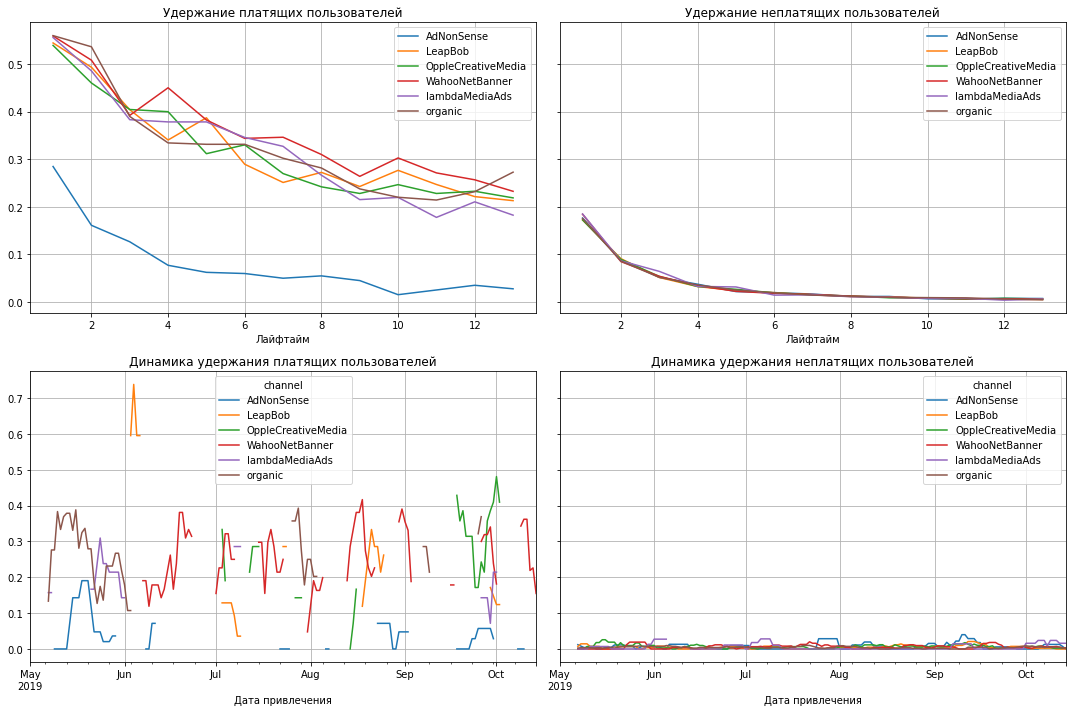

In [70]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visit, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Действительно пользователи канала AdNonSense плохо удерживаются.

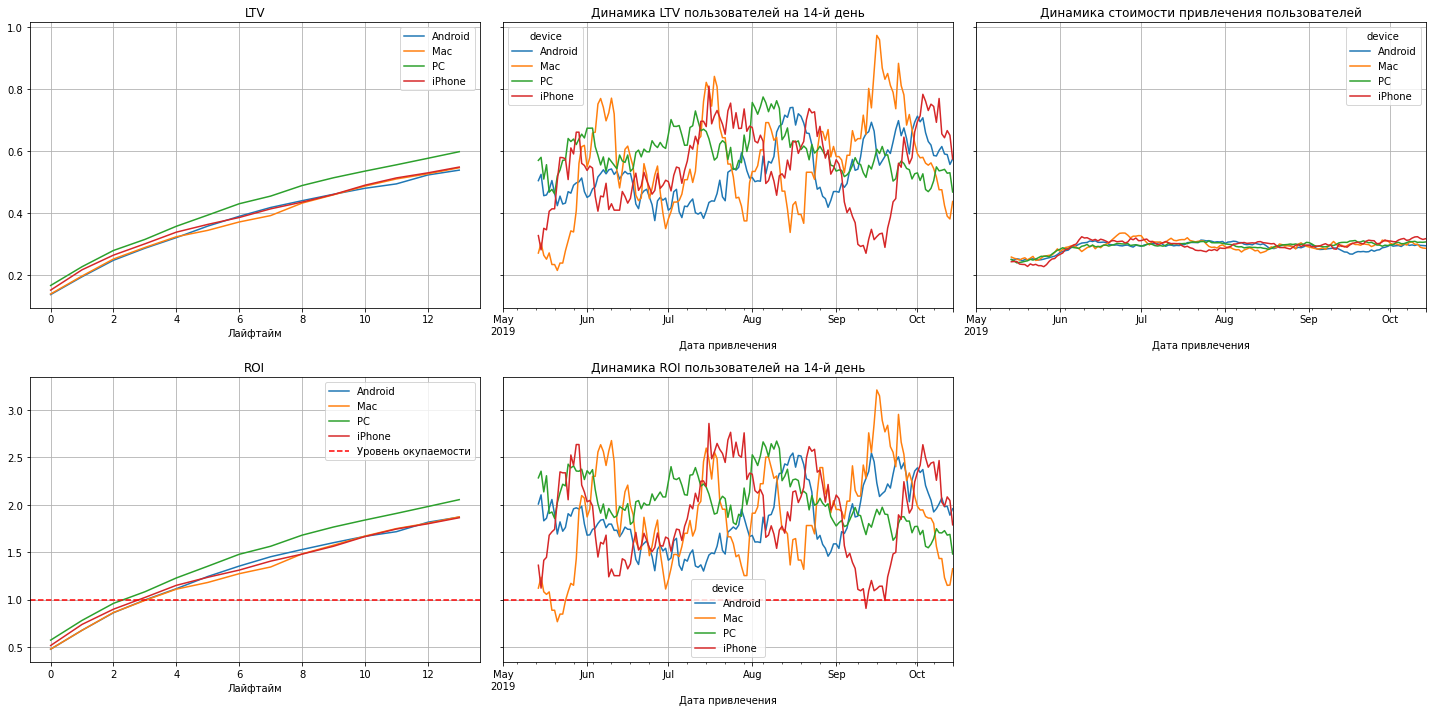

In [71]:
# смотрим окупаемость пользователей Европы с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, order, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

### Общий вывод

1. Реклама не окупается у пользователей из США, но окупается у пользователей из Европы.

2. Из стран США снижает окупаемость рекламы каналы TipTop, FaceBoom. Из Европы AdNonSense. Хуже всего удерживаются платящие пользователи устройств IPhone и MAC.

3. Проблемы с окупаемостью вызваны неправильным распределением средств на привлечение с каналов. И возможно техническими сбоями.

4. TipTop самый невыгодный канал для привлечения, с которого большинство пользователей из страны USA. Также стоит обратить внимание на каналы откуда привлекаются платящие пользователи PC, потому что они удерживаются лучше всего.


Больше всего было потрачено на маркетинг в каналах TipTop и FaceBoom. На них приходится больше 80% всех затрат. Можно сделать вывод, что затраты на маркетинг со временем возрастали только у TipTop. Самыми дорогими трафиками вышли TipTop (2.8), FaceBoom (1.11), AdNonSense(1.01).

Неокупившиеся каналы: AdNonSense, FaceBoom, TipTop. 
У канала TipTop неокупаемость может быть связана с неэффективной рекламой, при этом на нее уходит больше всего средств. Основное количество пользователей из США. Можно предположить, что через этот канал люди подключены к VPN, поэтому рекламная компания США не работает. Также, по динамеке был заметен провал после конца мая 2019 года. Возможно какое-то событие повлияло на рекламную компанию TipTop.

Основными пользователями каналов FaceBoom являются также жители США. Его неокупаемость связана с плохим удержание платящих клиентов. Возможно произошел какой-то програмный сбой.

Mac и IPhone оказались самыми неплатящими, возможно есть проблема с оптимизацией приложения Procrastinate Pro+ для ios устройств.

Эти два канала сделали США самым плохим регионом в плане удержания покупателей. ROI по странам в динамике показал, что с каждым месяцем привлеченные платящие пользователи из США всё хуже окупались, но динамика стоимости привлечения этих пользователей только наращивалась.

Конверсия пользователей FaceBoom была самой высокой, но удержание платящих пользователей было самое низкое. Видимо что-то повлияло на покупателей, что отталкивает от повторной покупки.

Канал AdNonSense также неокупился. Его пользователи из Европы. При этом этот канал самый высокий по конверсии и окупаемости рекламы. Его проблема заключается в удержании клиентов, возможно также есть технические проблемы.

Рекомендации для отдела маркетинга:

Большинсво пользователей находится в США. В первую очередь необходимо устранить проблемы с этим регионом.
Стоит пересмотреть приоритеты в рекламе.

У канала lambdaMediaAds самый высокий LTV  и один из наивысших ROI. Стоит обратить на него внимание.
Можем отметить высокую динамику роста окупаемости канала YRabbit, если поработать над конверсией будет виден потенциал.

Стоит отметить хорошую окупаемость канала RocketSuperAds начиная с августа.

При этом важно искать новых пользователей для Европы, а также каналы для привлечения пользователей. 

Стоит привлекать больше PC и Android пользователей. 

Решить проблему с удержанием пользователей iOS. Возможно имеются проблемы именно в этой операционной системе.

Стоит обратить на хорошие скочки роста у UK в летние месяцы.

Потенциал есть у платящих PC пользователей, удерживающихся очень хорошо. Стоит поработать над конверсией, которая довольно низкая.

В Европе стоит порекомендовать канал LambdaMediaAds, в Америке отдать предпочтение RocketSuperAds.